In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(
    'predicted_thicknesses/sermeq_aggregated_bootstrap_predictions_parameterization_9.csv')

In [3]:
df

,Unnamed: 0,RGIId,Mean Thickness,Weighted Mean Thickness,Weighted Thickness Uncertainty,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Total estimates
0,0,RGI60-01.00001,89.470677,89.178328,12.469448,90.208725,13.324304,0.961966,8.002178e-31,14.615185,78.807541,101.466180,90.208725,3893.0
1,1,RGI60-01.00002,94.511932,94.200018,12.630132,95.338460,13.734500,0.938489,1.897660e-37,14.512024,84.680046,106.452079,95.338460,3893.0
2,2,RGI60-01.00003,95.100831,94.801019,12.608573,96.016330,13.702269,0.934447,2.240937e-38,14.328064,85.629050,106.985116,96.016330,3893.0
3,3,RGI60-01.00004,99.072969,98.794480,13.133578,100.008880,14.257664,0.926270,4.034170e-40,14.600180,89.301013,111.255259,100.008880,3893.0
4,4,RGI60-01.00005,96.910173,96.620476,12.860802,97.802910,13.964042,0.931296,4.555047e-39,14.457055,87.238743,108.991119,97.802910,3893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,216496,RGI60-19.02748,93.152175,93.038257,8.368456,95.238920,9.752843,0.747442,0.000000e+00,7.730750,88.196306,100.011191,95.238920,3893.0
216497,216497,RGI60-19.02749,96.865891,96.746757,8.945308,99.174930,10.445848,0.745653,0.000000e+00,8.488490,91.348756,104.417971,99.174930,3893.0
216498,216498,RGI60-19.02750,98.358572,98.260168,8.691572,100.756210,10.319411,0.697235,0.000000e+00,7.237930,93.813785,105.217483,100.756210,3893.0
216499,216499,RGI60-19.02751,107.136535,106.925118,10.919047,109.820790,12.871444,0.753286,0.000000e+00,10.154685,100.292874,116.052736,109.820790,3893.0


In [18]:
df1 = gl.load_notebook_data(parameterization = '1') # no threshold
df2 = gl.load_notebook_data(parameterization = '2') # 0.25 threshold
df3 = gl.load_notebook_data(parameterization = '3') # 0.50 threshold
df4 = gl.load_notebook_data(parameterization = '4') # 0.75 threshold

In [19]:
glac = gl.load_training_data(RGI_input = 'y', 
#                              pth = '/data/fast1/glacierml/data/'
                            )


In [20]:
glac = glac[['RGIId', 'Thickness']]
df1 = pd.merge(df1, glac, on = 'RGIId', how = 'inner')
df2 = pd.merge(df2, glac, on = 'RGIId', how = 'inner')
df3 = pd.merge(df3, glac, on = 'RGIId', how = 'inner')
df4 = pd.merge(df4, glac, on = 'RGIId', how = 'inner')


In [22]:
df4

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Weighted Thickness Uncertainty,Weighted Volume (km3),Weighted Volume Std Dev (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness
0,RGI60-01.00037,209.310266,216.130900,40.039094,210.177814,31.040406,49.304142,7.281552,16.951648,26.560071,0.720072,0.000000e+00,28.533290,4025.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,235.0
1,RGI60-01.00570,90.494200,91.317276,15.268613,90.620581,13.843134,1.591932,0.243182,11.444827,13.472251,0.953788,6.638265e-34,16.051464,4025.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0
2,RGI60-01.01104,90.167323,91.284256,15.082671,90.327998,13.695153,0.860645,0.130487,11.012298,13.168568,0.951711,1.636929e-34,16.129360,4025.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,66.0
3,RGI60-01.02236,51.709261,50.033535,13.439234,51.614044,12.904955,0.007897,0.001974,12.636047,12.552256,0.984227,8.476528e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,83.0
4,RGI60-01.02236,51.709261,50.033535,13.439234,51.614044,12.904955,0.007897,0.001974,12.636047,12.552256,0.984227,8.476528e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,107.371899,110.740060,15.851901,107.723508,13.047987,0.022945,0.002779,8.407264,11.557920,0.770131,0.000000e+00,12.710630,4025.0,19,-65.052700,-63.393600,0.0,10,-999,50,0.213,-9,318,15.617301,0.989473,1.451944e-02,15.721304,0.932892,0.161842,0.003326,312.0
496,RGI60-19.01950,97.799947,101.289764,12.548057,98.052186,9.979163,0.709898,0.072249,4.821859,7.778115,0.656968,0.000000e+00,7.245646,4025.0,19,-62.047200,-58.376500,7.4,30,-999,630,7.240,150,5187,398.524960,0.950762,0.000000e+00,347.143980,49.511383,0.124630,2.885321,238.0
497,RGI60-19.02058,79.080798,81.504220,8.664019,79.236515,7.265205,0.091914,0.008428,3.921316,5.671141,0.712960,0.000000e+00,5.367575,4025.0,19,-62.675200,-60.390600,10.0,10,-999,370,1.160,260,1118,79.968520,0.769153,2.802597e-45,64.821260,25.859463,2.136447,0.092763,89.0
498,RGI60-19.02059,91.311536,94.843820,10.899248,91.532068,8.589527,0.502786,0.047182,3.631065,6.074749,0.608096,0.000000e+00,5.354730,4025.0,19,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,224.429600,0.983205,6.195902e-31,224.896590,30.958113,0.355534,1.232792,97.0


# Density plot of E&L vs GlaThiDa mean thickness

Sorting data...
Calculating point density...
Sorting data...
Calculating point density...
Sorting data...
Calculating point density...
Sorting data...
Calculating point density...


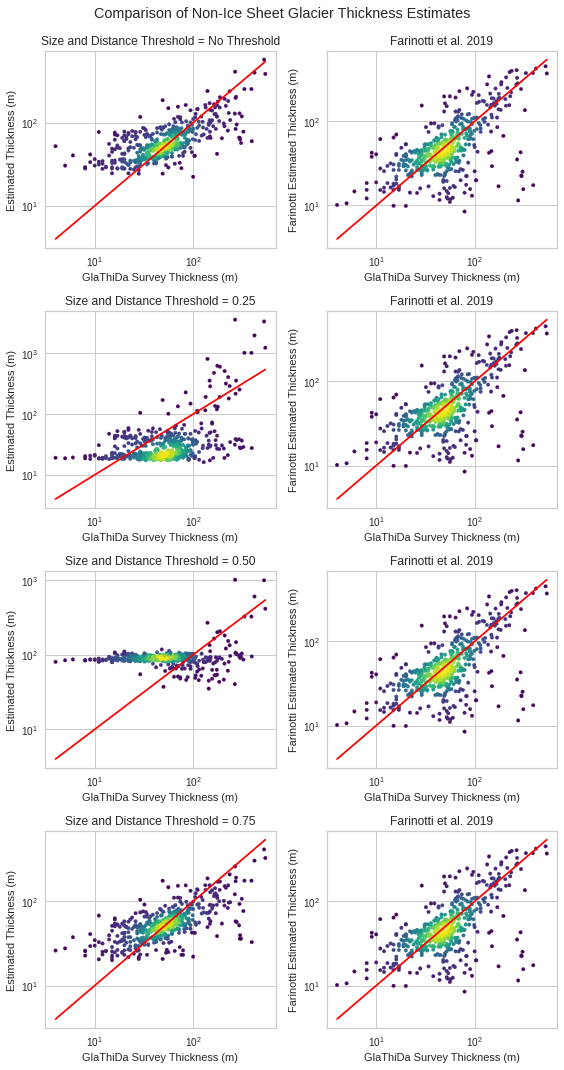

In [21]:
fig, ax = plt.subplots(4,2,figsize = (8,15),
#                        sharex = True, sharey = True
                      )

for n, dataset in enumerate((df1, df2, df3, df4)):
    data = dataset
    if n == 0:
        threshold = 'No Threshold'
    if n == 1:
        threshold = '0.25'
    if n == 2:
        threshold = '0.50'
    if n == 3:
        threshold = '0.75'
#     axs = plt.subplot(4, 1, n+1)

    data_1 = data['Mean Thickness']
    data_2 = data['Farinotti Mean Thickness']
    data_3 = data['Thickness']


    # data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
    # data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']

    print('Sorting data...')
    x_1 = np.sort(data_1)
    y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

    x_2 = np.sort(data_2)
    y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

    x_3 = np.sort(data_3)
    y_3 = 1. * np.arange(len(data_3)) / (len(data_3) - 1)

    print('Calculating point density...')
    # Calculate the point density
    xy = np.vstack([np.log10(data_1),np.log10(data_3)])

    z_1 = gaussian_kde(xy)(xy)

    yz = np.vstack([np.log10(data_2),np.log10(data_3)])

    z_2 = gaussian_kde(yz)(yz)
    
    ax[n,0].scatter(
            data['Thickness'],
            data['Mean Thickness'],
            c = z_1,
            cmap = 'viridis',
            marker = '.'
        )
    ax[n,0].set_xscale('log')
    ax[n,0].set_yscale('log')
    ax[n,0].plot(
        (data['Thickness'].min(), data['Thickness'].max()),
        (data['Thickness'].min(), data['Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
    
    ax[n,0].set_xlabel('GlaThiDa Survey Thickness (m)')
    ax[n,0].set_ylabel('Estimated Thickness (m)')
    ax[n,0].set_title('Size and Distance Threshold = ' + threshold)
    
    ax[n,1].scatter(
            data['Thickness'],
            data['Farinotti Mean Thickness'],
            c = z_2,
            cmap = 'viridis',
            marker = '.'
        )
    ax[n,1].plot(
        (data['Thickness'].min(), data['Thickness'].max()),
        (data['Thickness'].min(), data['Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
    ax[n,1].set_xscale('log')
    ax[n,1].set_yscale('log')
    ax[n,1].set_xlabel('GlaThiDa Survey Thickness (m)')
    ax[n,1].set_ylabel('Farinotti Estimated Thickness (m)')
    ax[n,1].set_title('Farinotti et al. 2019')
    
plt.suptitle('Comparison of Non-Ice Sheet Glacier Thickness Estimates', y = 0.99)
plt.tight_layout()

In [8]:
RGI = gl.load_RGI()

In [9]:
data = gl.parameterize_data('3')

In [10]:
data

,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness
0,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,235.0
1,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,147.0
2,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,66.0
8,61.200000,-140.302000,14.0,2145,2509,2894,5.859,341,3374,66.0
9,51.177000,-116.330000,15.3,2390,2526,2853,0.872,69,1181,70.0
...,...,...,...,...,...,...,...,...,...,...
489,-33.029600,-70.098400,29.0,2929,5121,5894,8.376,358,8560,59.0
490,-30.145400,-69.927600,29.3,4664,5187,5525,1.189,148,1596,28.0
491,-28.538700,-69.731800,16.0,4784,5234,5597,3.140,190,3349,39.0
492,-28.381400,-69.609100,11.6,5068,5406,5753,5.209,79,3782,67.0


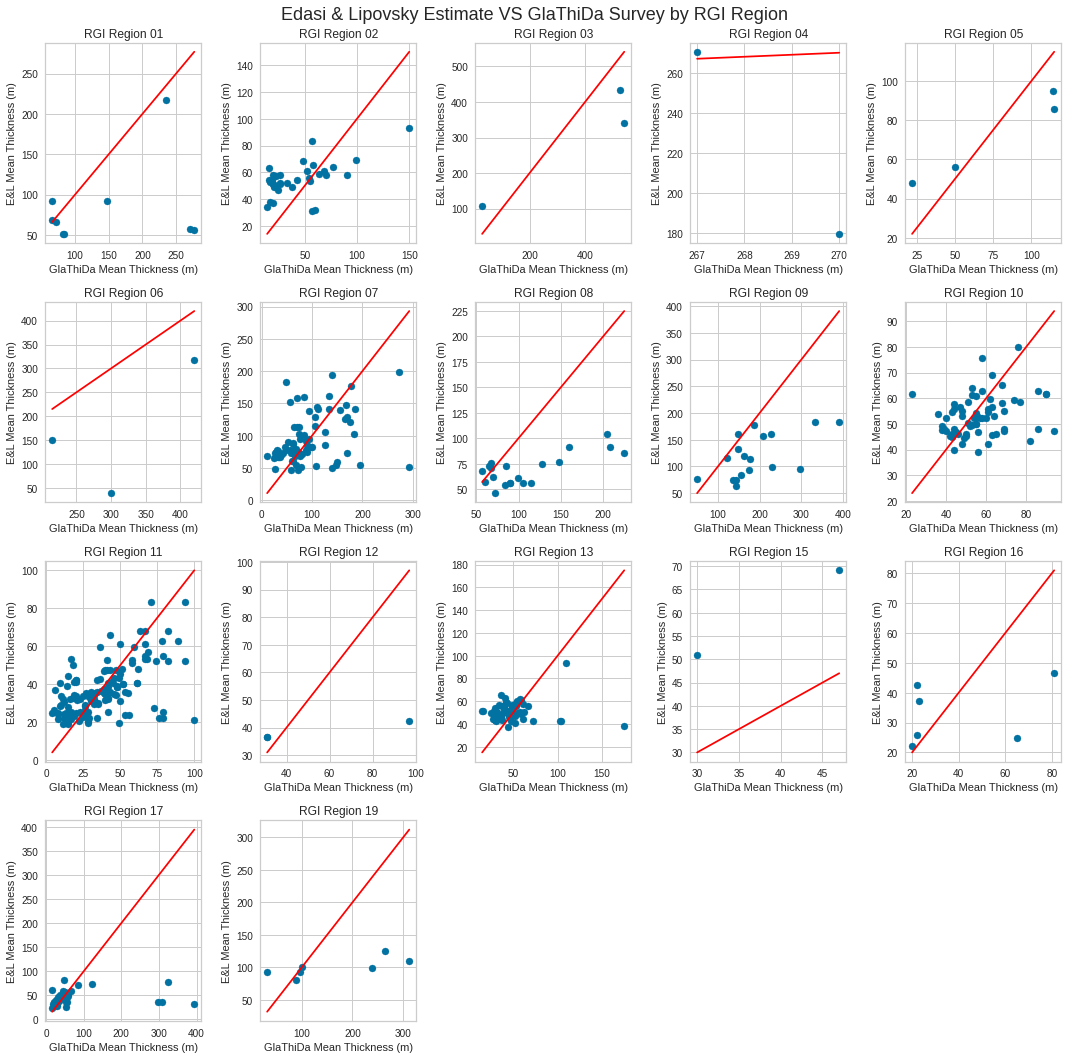

In [12]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
for n, reg in enumerate(df2['region'].unique()):
    dft = data[data['region'] == reg]
    data_1 = dft['Weighted Mean Thickness'],
    data_2 = dft['Thickness']
    ax = plt.subplot(4,5,n+1)
    ax.set_xlabel('GlaThiDa Mean Thickness (m)')
    ax.set_ylabel('E&L Mean Thickness (m)')
    ax.set_title('RGI Region ' + reg)
    plt.scatter(
        data_2,
        data_1,
#         marker = '.',
#         c = (z),
#         cmap = 'viridis'
    )
    # plt.axis('square')
    plt.plot(
        (dft['Thickness'].min(), dft['Thickness'].max()),
        (dft['Thickness'].min(), dft['Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
plt.suptitle('Edasi & Lipovsky Estimate VS GlaThiDa Survey by RGI Region', fontsize = 18)
plt.tight_layout()
# plt.axis('square')
# plt.sharex

# Do these terrible underestimated glaciers have anything in common?

In [13]:
data['Farinotti Residual'] = abs(data['Farinotti Mean Thickness'] - data['Thickness'])
data = data.sort_values('Farinotti Residual', ascending = False)

In [14]:
feature_list = [
    'Farinotti Mean Thickness', 'Thickness', 'Area', 'Slope', 
    'Lmax', 'Zmed', 'Zmax'
]

In [15]:
def rsf(rank = 'top', stat = 'mean'):
    

    residuals = []
    for feature in feature_list:
        if rank == 'top':
            if stat == 'mean':
                statistic = str(np.round(data[feature].head(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(data[feature].head(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(data[feature].head(111).std(),2))
        if rank == 'bot':
            if stat == 'mean':
                statistic = str(np.round(data[feature].tail(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(data[feature].tail(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(data[feature].tail(111).std(),2))
        residuals.append(statistic)
    return residuals

In [16]:
# feature_list.insert(0, 'Weighted Mean Thickness_x')
residual_stats_f = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_f

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,115.86,46.9,87.23,39.57,107.21,42.26
1,GlaThiDa Mean Thickness,128.93,46.18,94.0,40.0,99.88,42.0
2,Area (km^2),117.29,17.45,5.31,1.74,387.91,148.02
3,Slope(deg),15.32,18.16,13.6,17.7,8.61,5.75
4,Maximum Length (m),8966.82,3211.56,3745.0,2310.0,13060.36,6000.99
5,Median Elevation (m),1387.33,3099.81,749.0,3103.0,1328.77,1081.53
6,Maximum Elevation (m),1703.81,3427.49,1026.0,3488.0,1250.19,1113.09


In [17]:
data['E&L Residual'] = abs(data['Edasi Mean Thickness'] - data['Thickness'])
data = data.sort_values('E&L Residual', ascending = False)
feature_list.remove('Farinotti Mean Thickness')
feature_list.insert(0, 'Edasi Mean Thickness')

KeyError: 'Edasi Mean Thickness'

In [ ]:
residual_stats_e = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_e

In [ ]:
select = [x for x in residual_stats_f.columns if x != 'Feature']
df_f = residual_stats_f[select]
df_f

select = [x for x in residual_stats_e.columns if x != 'Feature']
df_e = residual_stats_e[select]
df_e

In [ ]:
df_f

# Build regional statistics difference table

In [ ]:
def find_residual_stat_diff(stat = 'length', region = '01', study = 'edasi'):
    
    dft = data[data['region'] == region]
    
    if stat == 'mean':
        
        mean_e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness']).mean()
        mean_g = np.array(dft['Thickness'] - dft['Thickness']).mean()
        mean_f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness']).mean()
        statistic_e = mean_e - mean_g
        statistic_f = mean_f - mean_g
    
    if stat == 'median':
        e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness'])
        median_e = np.median(e)
        g = np.array(dft['Thickness'] - dft['Thickness'])
        median_g = np.median(g)
        f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness'])
        median_f = np.median(f)
        statistic_e = median_e - median_g
        statistic_f = median_f - median_g
    
    if stat == 'std':
        std_e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness']).std()
        std_g = np.array(dft['Thickness'] - dft['Thickness']).std()
        std_f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness']).std()
        statistic_e = std_e - std_g
        statistic_f = std_f - std_g
    if stat == 'length':
        statistic_e = len(dft)
        statistic_f = len(dft)
#     print(statistic)
#     print(residuals)
    if study == 'edasi':
        residual = statistic_e
    if study == 'farinotti':
        residual = statistic_f
#     print(residuals)
    return residual

In [ ]:
region_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '15', '16', '17', '19']

In [ ]:
mean_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'edasi')
    mean_diff_e.append(res)

mean_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'farinotti')
    mean_diff_f.append(res)

median_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'edasi')
    median_diff_e.append(res)

median_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'farinotti')
    median_diff_f.append(res)

std_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'edasi')
    std_diff_e.append(res)

std_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'farinotti')
    std_diff_f.append(res)
    
trainable_glaciers = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'length', region = reg, study = 'farinotti')
    trainable_glaciers.append(res)
print(*trainable_glaciers)

In [ ]:
stats = pd.DataFrame({
    'RGI Region':[
        *region_list
    ],
    'E&L Difference of Mean':[
        *mean_diff_e
    ],
    'Farinotti Difference of Mean':[
        *mean_diff_f
    ],
    'E&L Difference of Median':[
        *median_diff_e
    ],    
    'Farinotti Difference of Median':[
        *median_diff_f
    ],
    'E&L Difference of STD':[
        *std_diff_e
    ],
    'Farinotti Difference of STD':[
        *std_diff_f
    ],
    'Trainable Glaciers':[
        *trainable_glaciers
    ]
})
stats

In [ ]:
stats.sort_values('RGI Region').to_latex()

In [ ]:
stats[[
    'RGI Region',
    'E&L Difference of Mean',
    'E&L Difference of Median',
    'E&L Difference of STD',
    'Trainable Glaciers'
]].to_latex()